# Binomial Distribution
***
## Definition
>The Binomial distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent experiments, each asking a yes–no question, and each with its own boolean-valued outcome. $ ^{[1]}$.

## Formula
The probability mass function of a Bernoulli distributed random variable is defined as:
$$ Binom(k|N,p) = {N \choose k}p^{k}(1-p)^{N-k} $$
where $N \cdot p$ denotes the mean of the distribution.

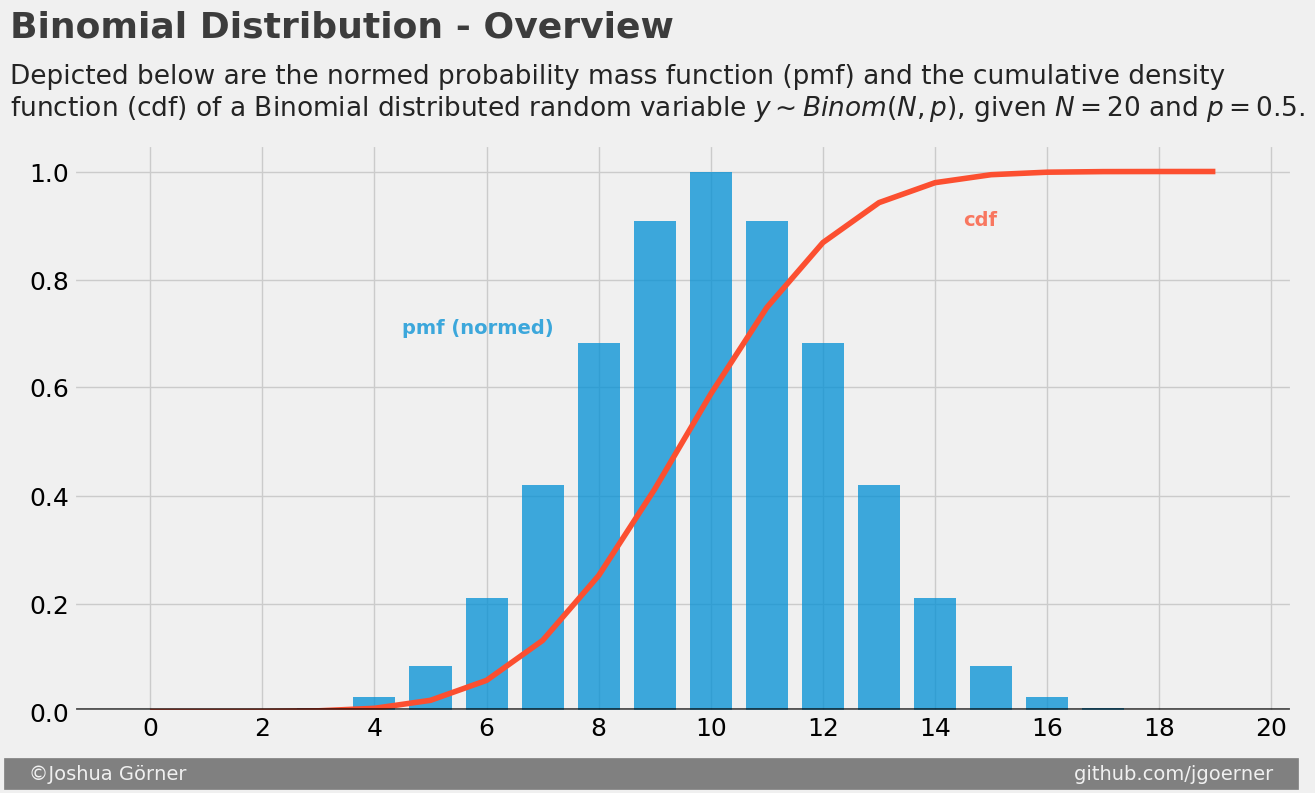

In [71]:
# %load ../src/binomial/01_general.py

***
## Parameters

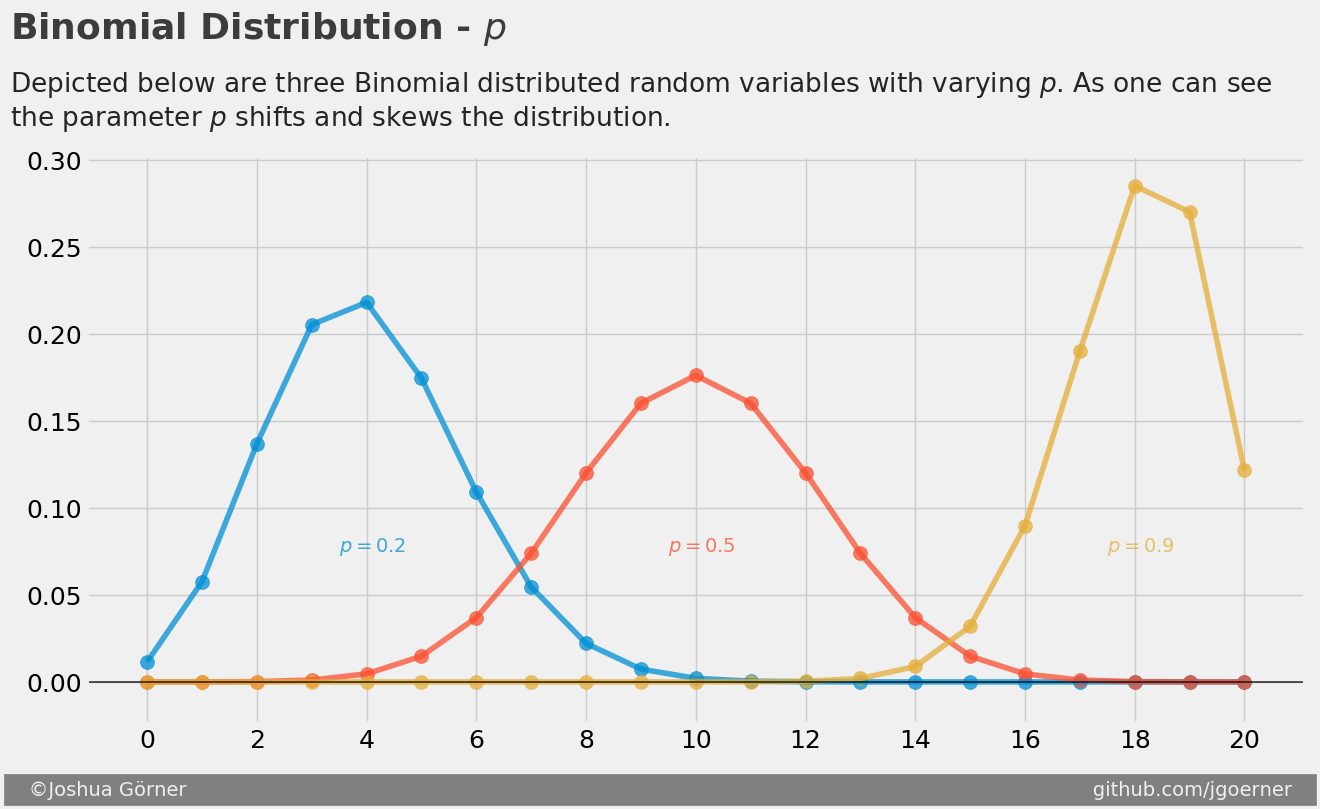

In [43]:
# %load ../src/binomial/02_p.py

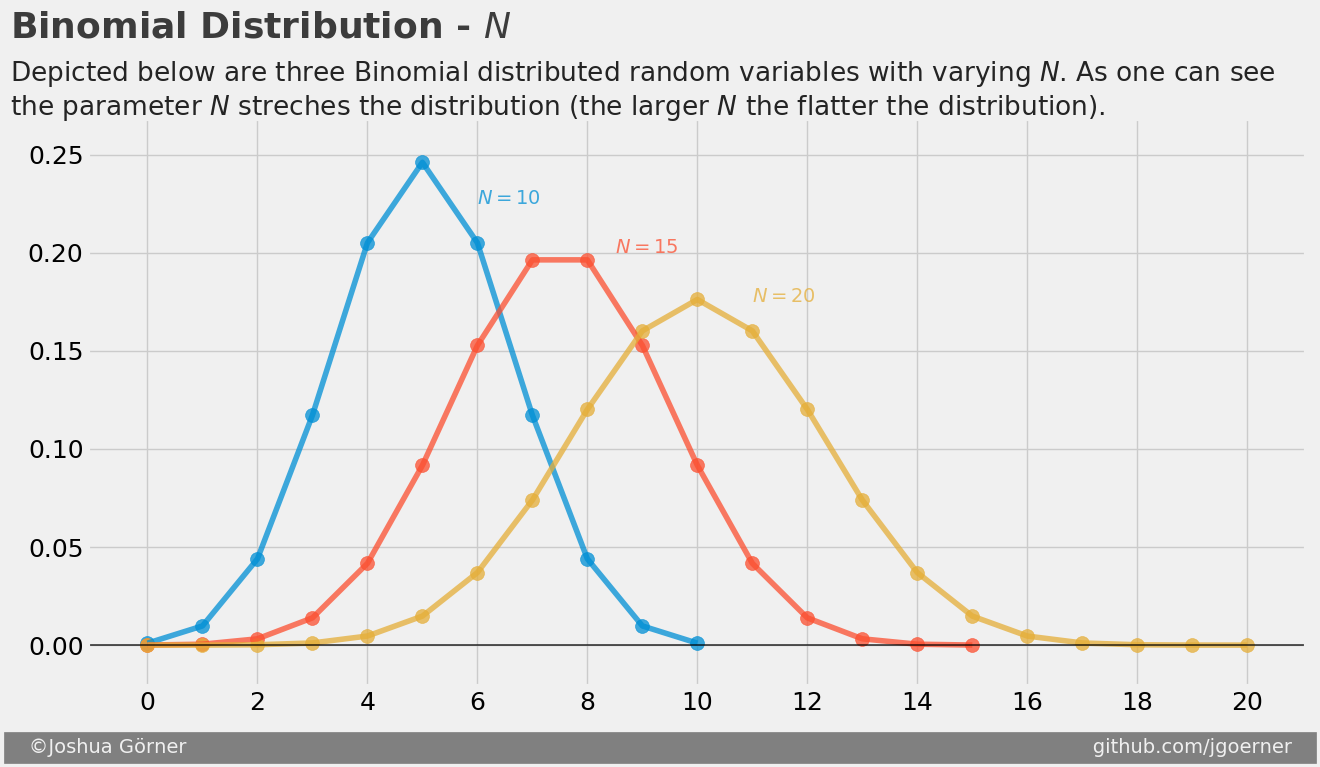

In [64]:
# %load ../src/binomial/03_n.py

*** 
## Implementation in Python
Multiple Python packages implement the Binomial distribution. One of those is the `stats.binom` module from the `scipy` package. The following methods are only an excerpt. For a full list of features the [official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html) should be read.

### Random Variates
In order to generate a random sample from, the function `rvs` should be used. 

In [79]:
import numpy as np
from scipy.stats import binom

# draw a single sample
np.random.seed(42)
print(binom.rvs(p=0.3, n=10), end="\n\n")

# draw 10 samples
print(binom.rvs(p=0.3, n=10, size=10), end="\n\n")

2

[5 4 3 2 2 1 5 3 4 0]



### Probability Mass Function
The probability mass function can be accessed via the `pmf` function (mass instead of density since the Binomial distribution is discrete). Like the `rvs` method, the `pdf` allows for adjusting the $p$ and $n$ of the random variable:

pmf(X=1) = 0.12106082100000018
pmf(X=7) = 0.009001692000000002


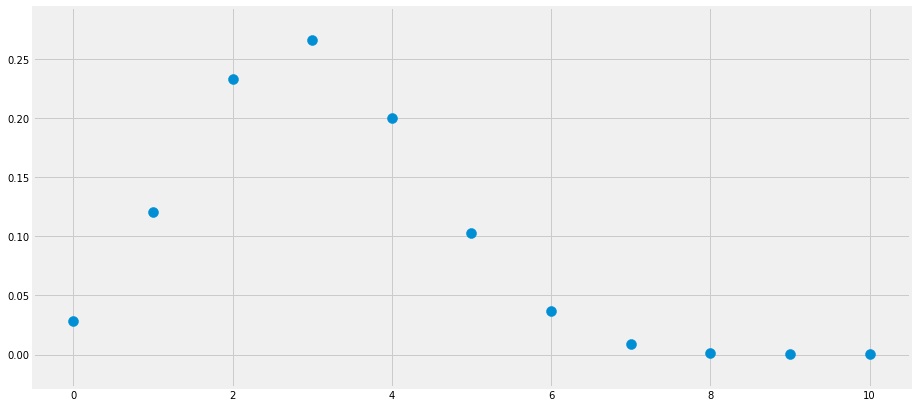

In [82]:
from scipy.stats import binom

# additional imports for plotting purpose
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (14,7)

# likelihood of x and y
x = 1
y = 7
print("pmf(X=1) = {}\npmf(X=7) = {}".format(binom.pmf(k=x, p=0.3, n=10), binom.pmf(k=y, p=0.3, n=10)))

# continuous pdf for the plot
x_s = np.arange(11)
y_s = binom.pmf(k=x_s, p=0.3, n=10)
plt.scatter(x_s, y_s, s=100);

### Cumulative Probability Density Function
The cumulative probability density function is useful when a probability range has to be calculated. It can be accessed via the `cdf` function:

In [2]:
from scipy.stats import binom

# probability of x less or equal 0.3
print("P(X <=3) = {}".format(binom.cdf(k=3, p=0.3, n=10)))

# probability of x in [-0.2, +0.2]
print("P(2 < X <= 8) = {}".format(binom.cdf(k=8, p=0.3, n=10) - binom.cdf(k=2, p=0.3, n=10)))

P(X <=3) = 0.6496107183999998
P(2 < X <= 8) = 0.6170735276999999


## Infering $N \& p$ - MCMC
If neither $N$ nor $p$ are given, they be estimated using Markov chain Monte Carlo simulation - implemented in Python's [PyMC3](https://github.com/pymc-devs/pymc3).

100%|██████████| 100500/100500 [00:58<00:00, 1714.63it/s]


95% of sampled ps are between 0.229 and 0.371
95% of sampled Ns are between 153.260 and 250.915


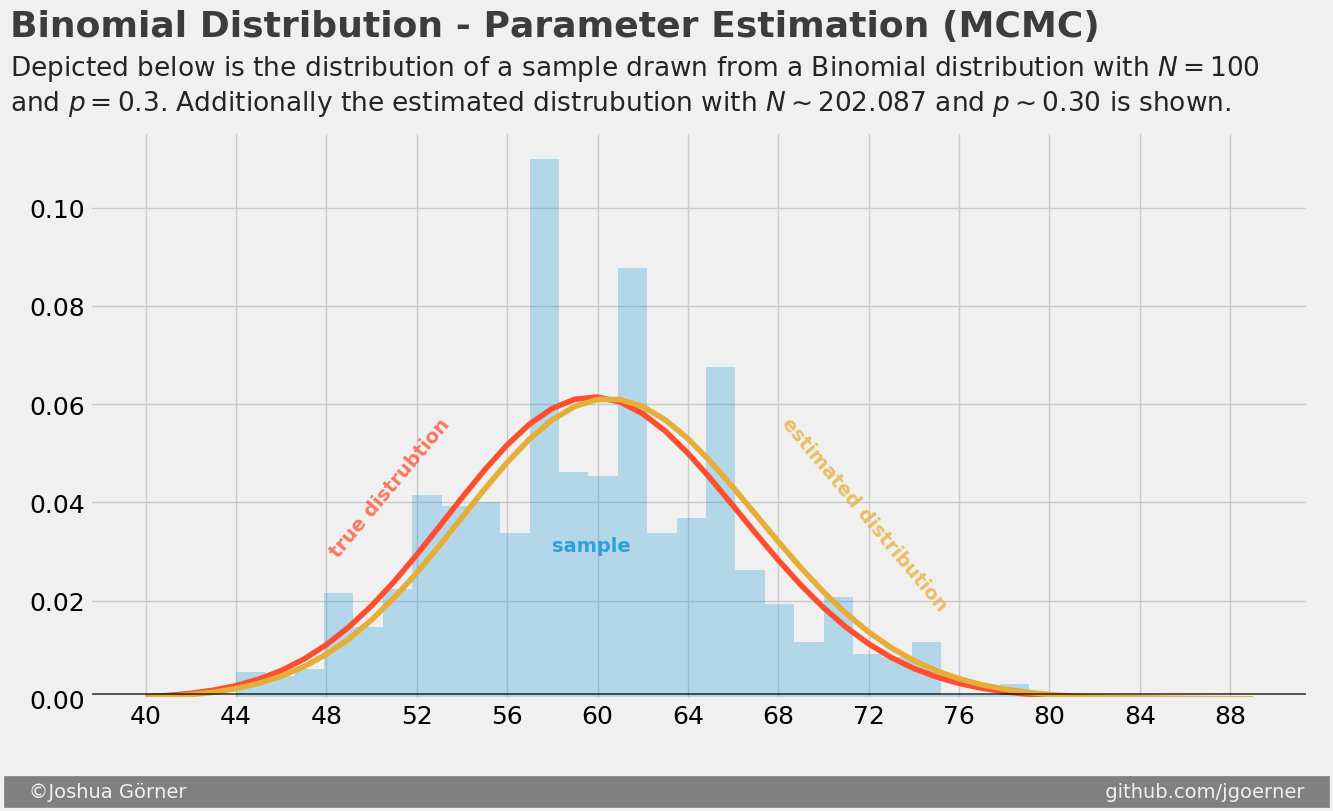

In [181]:
# %load ../src/binomial/04_mcmc_estimation.py

***
[1] - [Wikipedia. Binomial Distribution](https://en.wikipedia.org/wiki/Binomial_distribution)